# Project Setup

## Package Installation

In [ ]:
## Install packages
!pip install transformers &> /dev/null
!pip install sentence-transformers &> /dev/null

## Setting up GOGGLES

In [ ]:
## Cloning the GOGGLES repository and setting it up
#!git clone https://github.com/chu-data-lab/GOGGLES.git

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/MyDrive/CS_8803_DMM/GOGGLES/

/content/gdrive/MyDrive/CS_8803_DMM/GOGGLES


In [ ]:
# setting up the GOGGLES project
!python setup.py

usage: setup.py [global_opts] cmd1 [cmd1_opts] [cmd2 [cmd2_opts] ...]
   or: setup.py --help [cmd1 cmd2 ...]
   or: setup.py --help-commands
   or: setup.py cmd --help

error: no commands supplied


## Downloading dependencies for InferSent

In [ ]:
### DON'T RUN IF NOT USING INFERSENT ###
## Downloading dependencies for InferSent
# Downloading fastText vectors
!mkdir fastText
!curl -Lo fastText/crawl-300d-2M.vec.zip https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M.vec.zip
!unzip fastText/crawl-300d-2M.vec.zip -d fastText/
!rm fastText/crawl-300d-2M.vec.zip
# Downloading InferSent encoder
!mkdir encoder
!curl -Lo encoder/infersent2.pkl https://dl.fbaipublicfiles.com/infersent/infersent2.pkl
# Downloading models.py file from InferSent repository
!wget -nc "https://raw.githubusercontent.com/facebookresearch/InferSent/main/models.py"

mkdir: cannot create directory ‘fastText’: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1453M  100 1453M    0     0  27.8M      0  0:00:52  0:00:52 --:--:-- 50.0M
Archive:  fastText/crawl-300d-2M.vec.zip
replace fastText/crawl-300d-2M.vec? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: fastText/crawl-300d-2M.vec  
mkdir: cannot create directory ‘encoder’: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  146M  100  146M    0     0  25.8M      0  0:00:05  0:00:05 --:--:-- 25.8M
File ‘models.py’ already there; not retrieving.



## Import statements

In [ ]:
## Imports
import torch
import nltk
import gensim
nltk.download('punkt')

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import tensorflow_hub as hub

from transformers import AutoModel, AutoTokenizer
from sentence_transformers import SentenceTransformer

from nltk.tokenize import word_tokenize

from gensim.models.doc2vec import Doc2Vec, TaggedDocument

from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from collections import OrderedDict

import random
import torch
import torch.nn as nn
from torchvision import models
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Similarity Functions

In [ ]:
from scipy.spatial.distance import cityblock
def euclidean(a,b):
    dist = np.linalg.norm(a-b)
    return dist
cos = nn.CosineSimilarity(dim=0)
l1 = cityblock
l2 = euclidean
similairtyFunctions = [cos, cityblock, euclidean]

# Sentence Embeddings

## 0. BERT Embeddings

In [ ]:
# 1. BERT Embeddings
# Constants holding pre-trained model names

# Dimensions: 384
MINI_LM = 'all-MiniLM-L12-v2'
def bert_embedding(sentences, pre_trained_model):
    '''
    Returns the embeddings using BERT and a corresponding pre-trained model
        Parameters:
            sentences (List[String]): A list of N sentences (strings)
        Returns:
            embeddings (Tensor): A tensor of shape (N, M) containing vectorized sentences
                            M is the dimension determined by the model output
    '''
    model = SentenceTransformer(pre_trained_model)
    embeddings = model.encode(sentences)
    return torch.Tensor(embeddings)

# 1. Fast bert stuff

In [ ]:
import numpy as np
import pandas as pd
import torch
import transformers as ppb # pytorch transformers
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
# Reading in dataframe from Google Drive
'''cs_history_df = pd.read_csv('/content/gdrive/MyDrive/CS_8803_DMM/CsHs.csv')
cs_history_df = cs_history_df.sample(50)
cs_history_df['text'] = cs_history_df['text'].apply(lambda x: x[:511] if len(x) > 511 else x)'''

"cs_history_df = pd.read_csv('/content/gdrive/MyDrive/CS_8803_DMM/CsHs.csv')\ncs_history_df = cs_history_df.sample(50)\ncs_history_df['text'] = cs_history_df['text'].apply(lambda x: x[:511] if len(x) > 511 else x)"

In [ ]:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights,output_hidden_states=True)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
tokenized = cs_history_df['text'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

NameError: ignored

In [ ]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

In [ ]:
input_ids = torch.tensor(np.array(padded))

with torch.no_grad():
    output = model(input_ids)

In [ ]:
def shortBert(sentences):
  model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')
  tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
  model = model_class.from_pretrained(pretrained_weights,output_hidden_states=True)

  tokenized = sentences.apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

  max_len = 0
  for i in tokenized.values:
    if len(i) > max_len:
      max_len = len(i)

  padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
  attention_mask = np.where(padded != 0, 1, 0)
  attention_mask.shape

  input_ids = torch.tensor(np.array(padded))

  with torch.no_grad():
    output = model(input_ids)
  
  return output


## 2. InferSent Embeddings

In [ ]:
# 2. InferSent Embeddings
from models import InferSent
# Constant holding InferSent model path
INFERSENT_MODEL_PATH = 'encoder/infersent2.pkl'
# Constant holding word vector path
W2V_PATH = 'fastText/crawl-300d-2M.vec'

def infersent_embedding(sentences, enc_lstm_dim=2048):
    '''
    Returns the vectorization using InferSent
        Parameters:
            sentences (List[String]): A list of N sentences (strings)
        Returns:
            embeddings (Tensor): A tensor of shape (N, enc_lstm_dim * 2)
                containing vectorized sentences
    '''
    params_model = {
        'bsize': 64, 'word_emb_dim': 300, 'enc_lstm_dim': enc_lstm_dim,
        'pool_type': 'max', 'dpout_model': 0.0, 'version': 2
    }
    infersent = InferSent(params_model)
    infersent.load_state_dict(torch.load(INFERSENT_MODEL_PATH))
    infersent.set_w2v_path(W2V_PATH)
    infersent.build_vocab(sentences, tokenize=True)
    embeddings = infersent.encode(sentences, tokenize=True)
    return torch.Tensor(embeddings)

## 3. Universal Sentence Encoder (USE) Embeddings

In [ ]:
# 3. USE Embeddings
def use_embedding(sentences):
    '''
    Returns the vectorization using Universal Sentence Encoder
        Parameters:
            sentences (List[String]): A list of N sentences (strings)
        Returns:
            embeddings (Tensor): A tensor of shape (N, 512) containing vectorized sentences
    '''
    module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
    use_model = hub.load(module_url)
    print ("module %s loaded" % module_url)
    embeddings = torch.Tensor(use_model(sentences).numpy())
    return embeddings

## 4. Doc2Vec Embeddings

In [ ]:
# 4. Doc2Vec Embeddings
def tagged_document(tokenized_sentences):
    for i, tokenized in enumerate(tokenized_sentences):
        yield gensim.models.doc2vec.TaggedDocument(tokenized, [i])

def doc2vec_train(sentences, vector_size):
    tokenized_sentences = [word_tokenize(s) for s in sentences]
    data_for_training = list(tagged_document(tokenized_sentences))

    model = Doc2Vec(vector_size=vector_size, min_count=1, epochs=30)
    model.build_vocab(data_for_training)
    model.train(
        data_for_training,
        total_examples=model.corpus_count,
        epochs=model.epochs
    )
    model.save('d2v.model')
    print('Model saved as d2v.model')

def doc2vec_embedding(sentences, vector_size=256):
    '''
    Returns the vectorization using Doc2Vec
        Parameters:
            sentences (List[String]): A list of N sentences (strings)
        Returns:
            embeddings (Tensor): A tensor of shape (N, 256) containing vectorized sentences
    '''
    doc2vec_train(sentences, vector_size)
    model = Doc2Vec.load('d2v.model')
    embeddings = []
    for s in sentences:
        s_embed = torch.Tensor(model.infer_vector(s))
        embeddings.append(s_embed)
    embeddings = torch.stack(embeddings)
    return embeddings

## 5. TF-IDF

## 6. Custom BERT

In [ ]:
from collections import OrderedDict

import numpy as np
import torch
import torch.nn as nn
from torchvision import models


class BERT_Arch(nn.Module):

    def __init__(self, bert):

      freeze = True
      self._is_cuda = False
      
      super(BERT_Arch, self).__init__()
      
      self.base_model = bert

      self.input_size = 25

      #length will be 3 since there is an embedding layer, encoder, and then output layer
      bert_components = []
      for child in self.base_model.children():
        bert_components.append(child)

      bert_encoder_layers = []

      for layer in bert_components[1].layer:
        bert_encoder_layers.append(layer)

      self.features = [bert_components[0]] + bert_encoder_layers + [bert_components[2]]

      # dropout layer
      self.dropout = nn.Dropout(0.1)
      self.features.append(self.dropout)
      
      # relu activation function
      self.relu =  nn.ReLU()
      self.features.append(self.relu)

      # dense layer 1
      self.fc1 = nn.Linear(768,512)
      self.features.append(self.fc1)
      
      # dense layer 2 (Output layer)
      self.fc2 = nn.Linear(512,2)
      self.features.append(self.fc2)

      #softmax activation function
      self.softmax = nn.LogSoftmax(dim=1)
      self.features.append(self.softmax)
      
      self._features = nn.ModuleList(self.features).eval()
      

      self._is_frozen = freeze
      self.freeze(freeze)
      
      self._config = None
      
      #self._parse_config()

      self.layer_holder = []
    
    def _parse_config(self):
      self.zero_grad()

      x = self._make_cuda(torch.autograd.Variable(
          torch.rand(1, 3, self.input_size),
          requires_grad=False))

      self._config = OrderedDict()
      for i, layer in enumerate(self._features):
          x = layer(x)
          self._config[i] = (
              layer.__class__.__name__,
              tuple(x.size()[-3:]),)

      self.zero_grad()


    def _make_cuda(self, x):
      return x.cuda() if self._is_cuda else x


    def cuda(self, device_id=None):
      self._is_cuda = True
      return super(BERT_Arch, self).cuda(device_id)
     
    def freeze(self, freeze=True):
      requires_grad = not freeze
      for parameter in self.parameters():
          parameter.requires_grad = requires_grad

      self._is_frozen = freeze

    def forward(self, sent_id, mask):

      #pass the inputs to the model  
      self.layer_holder = []
      x = self._features[0](sent_id, mask)
      self.func1 = x
      self.layer_holder.append(self.func1)
      # print(x.shape)
      x = self._features[1](x)

      x = x[0]
      self.func2 = x
      self.layer_holder.append(self.func2)
      x = self._features[2](x)
      x = x[0]
      self.func3 = x
      # print(x.shape)
      self.layer_holder.append(self.func3)
      x = self._features[3](x)
      x = x[0]
      self.func4 = x
      self.layer_holder.append(self.func4)
      x = self._features[4](x)
      x = x[0]
      self.func5 = x
      self.layer_holder.append(self.func5)
      x = self._features[5](x)
      x = x[0]
      self.func6 = x
      self.layer_holder.append(self.func6)
      x = self._features[6](x)
      x = x[0]
      self.func7 = x
      self.layer_holder.append(self.func7)
      x = self._features[7](x)
      x = x[0]
      self.func8 = x
      self.layer_holder.append(self.func8)
      x = self._features[8](x)
      x = x[0]
      self.func9 = x
      self.layer_holder.append(self.func9)
      x = self._features[9](x)
      x = x[0]
      self.func10 = x
      self.layer_holder.append(self.func10)
      x = self._features[10](x)
      x = x[0]
      self.func11 = x
      self.layer_holder.append(self.func11)
      x = self._features[11](x)
      x = x[0]
      self.func12 = x
      self.layer_holder.append(self.func12)
      x = self._features[12](x)
      x = x[0]
      self.func13 = x
      self.layer_holder.append(self.func13)
      x = self._features[13](x)
      x = self._features[14](x)
      
      x = self._features[15](x)
      
      x = self._features[16](x)
      x = self._features[17](x)
      x = self._features[18](x)
      self.func14 = x
      self.layer_holder.append(self.func14)
      print('layer holder')
      print(self.layer_holder)
      print(self.layer_holder)
      return x

    def create_affinity_matrix(self):
      #define cosine simil function
      cos = nn.CosineSimilarity(dim=0)
      
      mat_list = []

      #go through for loop to get output of each layer
      for output in self.layer_holder:
        #get number of datapoints
        print(output.shape)
        dim_temp = output.shape[0]
        cos_mat = np.zeros((dim_temp, dim_temp))
        euc_mat = np.zeros((dim_temp, dim_temp))
        city_mat = np.zeros((dim_temp, dim_temp))

        for num1 in range(dim_temp):
          for num2 in range(dim_temp):
            
            flatten1 = output[num1].flatten()
            flatten2 = output[num2].flatten()

            # print(flatten1.shape)

            simi_score = cos(flatten1, flatten2)
            cos_mat[num1][num2] = simi_score
            
            c = euclidean(flatten1,flatten2)
            euc_mat[num1][num2] = c

            d = cityblock(flatten1,flatten2)
            city_mat[num1][num2] = d

            

        mat_list.append(cos_mat)
        mat_list.append(euc_mat)
        mat_list.append(city_mat)
      return mat_list

In [ ]:
# function for evaluating the model
def evaluate():
  
  print("\nEvaluating...")
  
  # deactivate dropout layers
  model.eval()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save the model predictions
  total_preds = []

  # iterate over batches
  for step,batch in enumerate(val_dataloader):
    
    # Progress update every 50 batches.
    if step % 50 == 0 and not step == 0:
      
      # Calculate elapsed time in minutes.
      # elapsed = format_time(time.time() - t0)
            
      # Report progress.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    # push the batch to gpu
    #batch = [t.to(device) for t in batch]
    # print(batch)
    sent_id,mask, labels = batch

    #print(sent_id)
  
    # deactivate autograd
    with torch.no_grad():
      
      # model predictions
      preds = model(sent_id,mask)
      # affinity_matrix = model.create_affinity_matrix()
      # print(preds)

      
      # compute the validation loss between actual and predicted values
      # labels = labels - 1
      loss = cross_entropy(preds,labels)

      total_loss = total_loss + loss.item()

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

  # compute the validation loss of the epoch
  avg_loss = total_loss / len(val_dataloader) 

  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

# Preparing Dataset

## Loading Dataset

In [ ]:
import torch
import torch.nn as nn
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast
from torchvision import models
import pandas as pd


# specify GPU
device = torch.device("cuda")

In [ ]:
# df = pd.read_csv("spamdata_v2.csv")
#pick name of whatever csv file/dataset you want to load in
filename = 'twitter_hatred.csv'
df = pd.read_csv("/content/gdrive/MyDrive/CS_8803_DMM/"+filename)

# df = df.iloc[0:50, len(df)-50:]
df.head()
df = df.sort_values(by=['label'])

In [ ]:
df[30000:30010]

,id,label,tweet
31365,31366,1,you okay with this @user of course you are!!!!...
1108,1109,1,"@user all happy for Ã¨ #lbgt family,but what i..."
31806,31807,1,please don't forget to use the word ! that is ...
31364,31365,1,america isn't racist. their are a plethora of ...
16645,16646,1,carl paladino is a former trump campaign offic...
15522,15523,1,thank you comrade @user is it erica avenue? i ...
15523,15524,1,a white-skinned woman's unfair experience of ...
30916,30917,1,the alt-right movement is like: mustfall
15525,15526,1,it's clear that we're having a crisis of #comp...
16638,16639,1,@user remark is racist even if only uttered t...


In [ ]:
df
temp_df = pd.concat((df[12000:12500],df[30000:30533]))

dev_set_indices = [0,67,102,150, 175,210,285, 343, 375, 394]
dev_set_labels = [0,0,0,0,0,1,1,1,1,1]

In [ ]:
#use this random generator to generate which indices you want to use

neg = random.sample(range(0, 250), 10)
pos = random.sample(range(250, 450), 10)
len(temp_df)

1033

In [ ]:
#set the labeled examples, so their index and then their label, this is the variation of 3,5, and 10
dev_set_indices3 = neg[:3] + pos[:3]
dev_set_labels3 = [0,0,0,1,1,1]


dev_set_indices5 = neg[:5] + pos[:5]
dev_set_labels5 = [0,0,0,0,0,1,1,1,1,1]


dev_set_indices10 = neg[:10] + pos[:10]
dev_set_labels10 = [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]

# Data Pre-Processing for Non-BERT

In [ ]:
#use
embedder_df = temp_df

embedder_df['use_embedding'] = use_embedding(embedder_df['tweet'])

vectorizer = TfidfVectorizer()


#tf idf
vectors_train = vectorizer.fit_transform(embedder_df['tweet'])

feature_names_train = vectorizer.get_feature_names()

dense_train = vectors_train.todense()

embedder_df['tfidf_embedding'] = torch.tensor(dense_train)

INFO:absl:Using /tmp/tfhub_modules to cache modules.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder/4'.
INFO:absl:Downloading https://tfhub.dev/google/universal-sentence-encoder/4: 890.00MB
INFO:absl:Downloaded https://tfhub.dev/google/universal-sentence-encoder/4, Total size: 987.47MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder/4'.


module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#infersent
#embedder_df['infer_sent_embedding'] = infersent_embedding(embedder_df['tweet'])


#doc2vec
embedder_df['doc2vec_embedding'] = doc2vec_embedding(embedder_df['tweet'])


#bert
embedder_df['bert_embedding'] = bert_embedding(embedder_df['tweet'].tolist(),MINI_LM)

Model saved as d2v.model


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/573 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/352 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
len(embedder_df)

1033

# Data Pre-Processing for BERT

In [ ]:
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')
# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

In [ ]:
val_text, val_labels = temp_df['tweet'], temp_df['label']
len(val_text)

1033

88.78509196515004

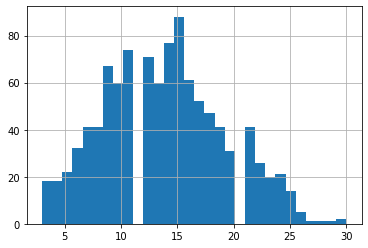

In [ ]:
seq_len = [len(i.split()) for i in val_text]

pd.Series(seq_len).hist(bins = 30)
np.mean(temp_df['tweet'].str.len())

In [ ]:
# tokenize and encode sequences in the training set
'''tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = 200,
    pad_to_max_length=True,
    truncation=True
)'''

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the test set
'''tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = 200,
    pad_to_max_length=True,
    truncation=True
)'''


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2227: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


'tokens_test = tokenizer.batch_encode_plus(\n    test_text.tolist(),\n    max_length = 200,\n    pad_to_max_length=True,\n    truncation=True\n)'

In [ ]:
#convert to tensors
'''train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())'''

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

'''test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())'''

"test_seq = torch.tensor(tokens_test['input_ids'])\ntest_mask = torch.tensor(tokens_test['attention_mask'])\ntest_y = torch.tensor(test_labels.tolist())"

In [ ]:
#make dataloaders
#BERT val data loader
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 1500

# wrap tensors
#train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
#train_sampler = RandomSampler(train_data)

# dataLoader for train set
#train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)
# val_data = val_data[0:2]
# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)
# val_dataloader = val_dataloader[0:2]
val_mask.shape

torch.Size([1033, 25])

In [ ]:
model = BERT_Arch(bert)
# push the model to GPU

In [ ]:

# optimizer from hugging face transformers
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(),
                  lr = 1e-5)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights, this is just for spam dataset bc its unbalanced
class_weights = compute_class_weight('balanced', classes=np.unique(val_labels), y=val_labels)
c = class_weights
print("Class Weights:",class_weights)
dummy = [0 for i in range(766)]

class_weights = np.ndarray.tolist(class_weights) + dummy
class_weights = np.array(class_weights) 

print(c)


Class Weights: [1.033      0.96904315]
[1.033      0.96904315]


In [ ]:
# converting list of class weights to a tensor
weights= torch.tensor(c,dtype=torch.float)

# push to GPU
#weights = weights.to(device)

# define the loss function
cross_entropy  = nn.NLLLoss(weight=weights)

# number of training epochs
epochs = 1

In [ ]:
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #evaluate model
    valid_loss, preds = evaluate()




 Epoch 1 / 1

Evaluating...
layer holder
[tensor([[[ 0.1706, -0.3644, -0.3586,  ...,  0.0354,  0.0281,  0.1463],
         [ 0.2339, -1.0951, -1.0030,  ..., -0.4231,  0.3922, -0.3365],
         [-0.7196, -0.6911,  0.1953,  ...,  0.0111,  0.9551, -0.2364],
         ...,
         [ 0.3752, -0.4919, -0.2904,  ...,  0.0972, -0.3117, -0.0602],
         [ 0.2249, -0.3303, -0.1907,  ...,  0.3161, -0.3512, -0.0074],
         [ 0.0376, -0.3881, -0.3314,  ...,  0.2460, -0.2616,  0.1107]],

        [[ 0.1706, -0.3644, -0.3586,  ...,  0.0354,  0.0281,  0.1463],
         [ 0.2339, -1.0951, -1.0030,  ..., -0.4231,  0.3922, -0.3365],
         [-0.7196, -0.6911,  0.1953,  ...,  0.0111,  0.9551, -0.2364],
         ...,
         [ 0.3752, -0.4919, -0.2904,  ...,  0.0972, -0.3117, -0.0602],
         [ 0.2249, -0.3303, -0.1907,  ...,  0.3161, -0.3512, -0.0074],
         [ 0.0376, -0.3881, -0.3314,  ...,  0.2460, -0.2616,  0.1107]],

        [[ 0.1706, -0.3644, -0.3586,  ...,  0.0354,  0.0281,  0.1463],
  

In [ ]:
#this is the function for affinity matrix construction from the custom bert model, you can either use this or
#call the model's function, they are both the same thing

def create_affinity_matrix(model):
      #define cosine simil function
      cos = nn.CosineSimilarity(dim=0)
      
      mat_list = []

      #go through for loop to get output of each layer
      for output in model.layer_holder:
        #get number of datapoints
        #print(output.shape)
        dim_temp = output.shape[0]
        cos_mat = np.zeros((dim_temp, dim_temp))
        euc_mat = np.zeros((dim_temp, dim_temp))
        city_mat = np.zeros((dim_temp, dim_temp))

        for num1 in range(dim_temp):
          for num2 in range(dim_temp):
            
            flatten1 = output[num1].flatten()
            flatten2 = output[num2].flatten()

            # print(flatten1.shape)

            simi_score = cos(flatten1, flatten2)
            cos_mat[num1][num2] = simi_score
            
            c = euclidean(flatten1,flatten2)
            euc_mat[num1][num2] = c

            d = cityblock(flatten1,flatten2)
            city_mat[num1][num2] = d

            

        mat_list.append(cos_mat)
        mat_list.append(euc_mat)
        mat_list.append(city_mat)
      return mat_list
#this is output from custom bert model aff matrix construction
mat_list = create_affinity_matrix(model)

Pipeline

In [ ]:
#aff_matrices = make_Aff_matrices(model,similairtyFunctions)
#print(len(aff_matrices))

In [ ]:
#IMPORTANT, this is affinity matrix construction for non-custom bert model, like use, doc2vec, etc

def create_affinity_matrix(df_temp):
    #define cosine simil function
    cos = nn.CosineSimilarity(dim=0)
    
    mat_list = []

    #go through for loop to get output of each layer
    # for output in self.layer_holder:
      #get number of datapoints
      # print(output.shape)
    output = df_temp
    dim_temp = df_temp.shape[0]
      # print(dim_temp)
    cos_mat = np.zeros((dim_temp, dim_temp))
    euc_mat = np.zeros((dim_temp, dim_temp))
    city_mat = np.zeros((dim_temp, dim_temp))

    for num1 in range(dim_temp):
      for num2 in range(dim_temp):
      
        if type(output[num1]) == tuple:
          flatten1 = (torch.stack(output[num1])).squeeze(0)
          
        else:
          flatten1 = flatten1 = output[num1].flatten()
        
        if type(output[num2]) == tuple:
          flatten2 = (torch.stack(output[num2])).squeeze(0)

        else:
          flatten2 = output[num2].flatten()

        simi_score = cos(flatten1, flatten2)
        cos_mat[num1][num2] = simi_score
            
        c = euclidean(flatten1,flatten2)
        euc_mat[num1][num2] = c

        d = cityblock(flatten1,flatten2)
        city_mat[num1][num2] = d

        

    mat_list.append(cos_mat)
    mat_list.append(euc_mat)
    mat_list.append(city_mat)
    return mat_list

In [ ]:
##IMPORTANT, run this line, very convenient, sets indices in dataframe to start from 0 rather than whatever it might have been before

embedder_df = embedder_df.reset_index()

In [ ]:
#this code block creates affinity matrix for the embeddings below, if you want to use infersent, add it to the list
embeddings_list = ['bert_embedding','tfidf_embedding','use_embedding','doc2vec_embedding']
global_mat = []
for embedding in embeddings_list:
  mats = create_affinity_matrix(embedder_df[embedding])
  global_mat.extend(mats)
global_mat.extend(mat_list)

# Outputting matrices to file

In [ ]:
#pick which dataset youre doing, and then save it

dataset_name = 'twitter'

np.save('/content/gdrive/MyDrive/CS_8803_DMM/'+dataset_name+'.npy', global_mat, allow_pickle=True)

#use the line below to load back in whatever matrices you want
#b = np.load('/content/gdrive/MyDrive/CS_8803_DMM/'+dataset_name+'.npy', allow_pickle=True)

In [ ]:
#use this cell to load in old matrices if you need
#dataset_name = 'spam' twitter yelp_pn
#np.load('/content/gdrive/MyDrive/CS_8803_DMM/'+dataset_name+'.npy', allow_pickle=True)

# GOGGLES

In [ ]:
len(val_labels)

1033

In [ ]:
#the last 42 matrices inside global_mat will always be from the custom bert layers, while the ones before we will be from ind embeddings
#in the current case, first 12 are not from custom bert bc we did 4 embeddings and 3 matrices from each embedding
bertAFs = global_mat[12:]
nonbertAFs = global_mat[:12]

In [ ]:
#here, set AFs to any of global_mat or its partitions from the above cell, to test different cases
AFs = global_mat


len(global_mat)

54

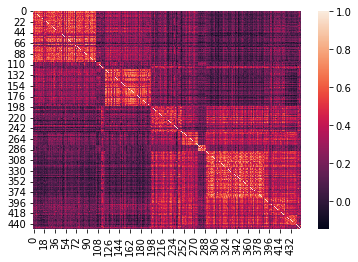

In [ ]:
import seaborn as sns
sns.heatmap(AFs[0])

In [ ]:
#use this random generator to generate which indices you want to use

neg = random.sample(range(0, 500), 10)
pos = random.sample(range(500, 1020), 10)


In [ ]:
#set the labeled examples, so their index and then their label, this is the variation of 3,5, and 10
dev_set_indices3 = neg[:3] + pos[:3]
dev_set_labels3 = [0,0,0,1,1,1]


dev_set_indices5 = neg[:5] + pos[:5]
dev_set_labels5 = [0,0,0,0,0,1,1,1,1,1]


dev_set_indices10 = neg[:10] + pos[:10]
dev_set_labels10 = [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]

dev_set_indices20 = neg + pos
dev_set_labels20 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [ ]:
#there are 3 variations for dev_set params: dev_set_indices3,dev_set_labels3    dev_set_indices5,dev_set_labels5    dev_set_indices10,dev_set_labels10

from goggles import infer_labels
prob = infer_labels(AFs,dev_set_indices10,dev_set_labels10)

100%|██████████| 54/54 [00:19<00:00,  2.81it/s]
/content/gdrive/My Drive/CS_8803_DMM/GOGGLES/goggles/inference_models/semi_supervised_models.py:47: RuntimeWarning: invalid value encountered in log
  return np.exp(np.sum(X*np.log(mu+DEL)+(1-X)*np.log(1-mu+DEL),axis=1))


The feasibility probability is: 0.025309677975330964
The probability of the dev set being sufficient is: 0.2109621797342607


In [ ]:
#this will test accuracy of labeled predictions using ground-truth labels

from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

y_true = val_labels
pred_labels = np.argmax(prob,axis=1).astype(int)
print("accuracy", accuracy_score(y_true,pred_labels))

accuracy 0.484027105517909


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_true, pred_labels, average='macro')

0.32615786040443573